<a href="https://colab.research.google.com/github/Reshmisivaraj/ml/blob/main/used_mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor#we use this to combine two different types of regressor to get  a better result
)

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
mobile=pd.read_csv('/content/used_phone_data.csv')

In [35]:
mobile.shape

(3571, 15)

In [36]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [37]:
mobile.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [38]:
mobile.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [39]:
mobile.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


In [40]:
mobile['ram'].fillna(mobile['ram'].mean(),inplace=True)

In [41]:
mobile['selfie_camera_mp'].fillna(mobile['selfie_camera_mp'].mean(),inplace=True)

Text(0, 0.5, 'used_price')

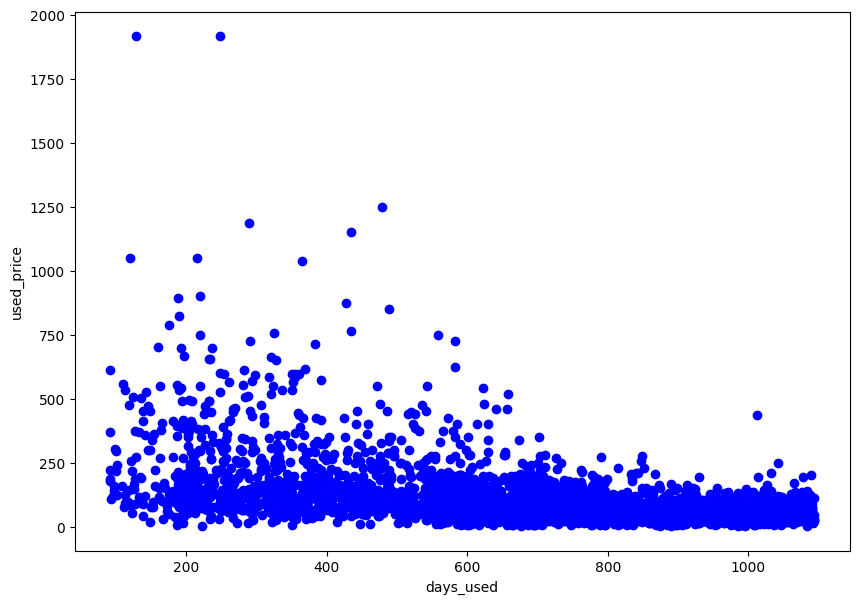

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(mobile["days_used"],mobile["used_price"],color="blue")
plt.xlabel("days_used")
plt.ylabel("used_price")

Text(0, 0.5, 'used_price')

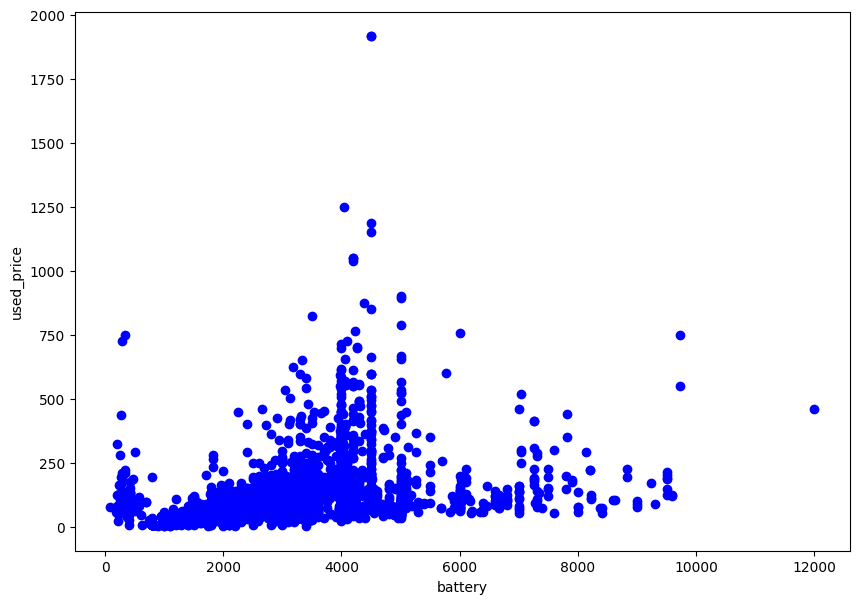

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(mobile["battery"],mobile["used_price"],color="blue")
plt.xlabel("battery")
plt.ylabel("used_price")

Text(0, 0.5, 'used_price')

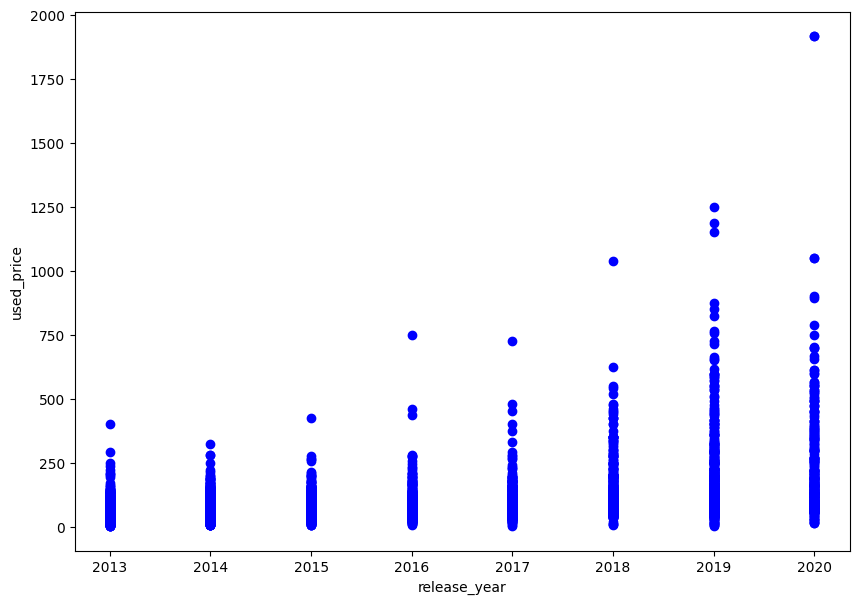

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(mobile["release_year"],mobile["used_price"],color="blue")
plt.xlabel("release_year")
plt.ylabel("used_price")

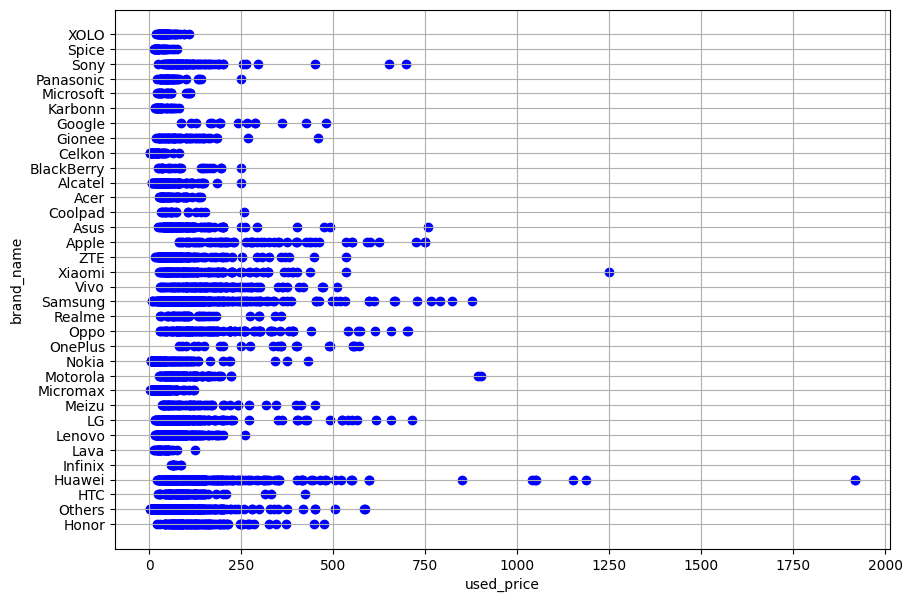

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(mobile["used_price"],mobile["brand_name"],color="blue")
plt.xlabel("used_price")
plt.ylabel("brand_name")
plt.grid(True)
plt.show()

In [46]:
mobile.replace({'5g':{'no':0,'yes':1},'4g':{'no':0,'yes':1}})

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96
1,Honor,Android,28.10,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49
2,Honor,Android,24.29,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55
3,Honor,Android,26.04,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,1,0,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07


<ipython-input-47-9ba426d3bca0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


<Axes: xlabel='4g', ylabel='used_price'>

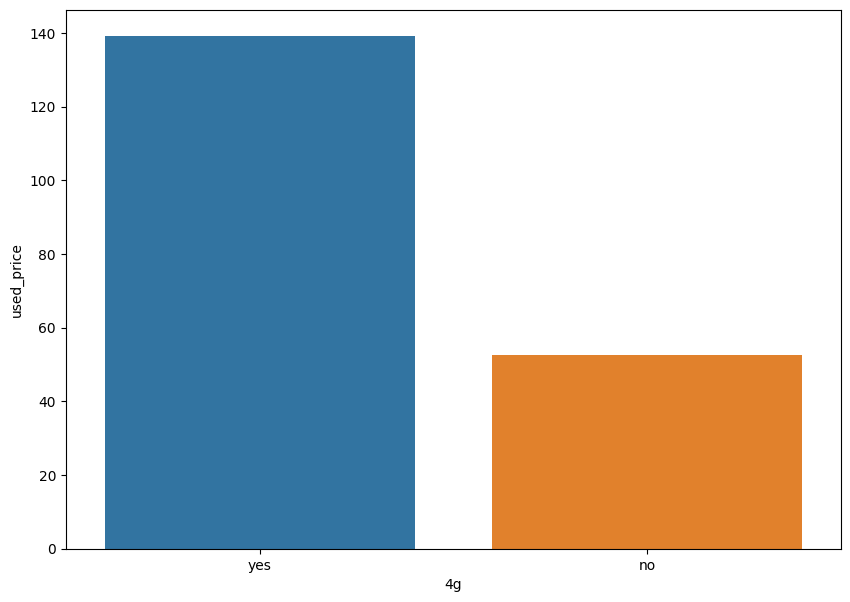

In [47]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(
    x=mobile["4g"],
    y=mobile["used_price"],
    ci=False
)

<ipython-input-48-896d38c705f5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(


<Axes: xlabel='5g', ylabel='used_price'>

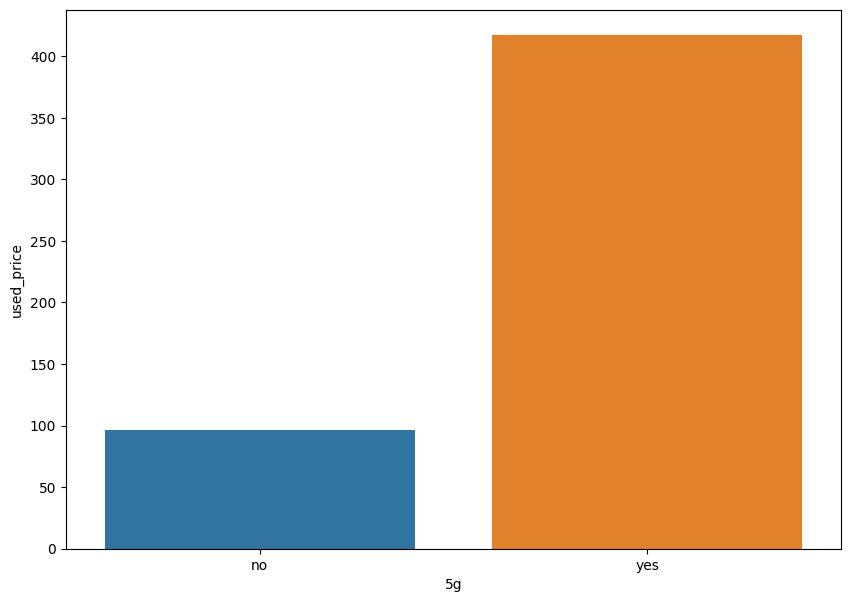

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(
    x=mobile["5g"],
    y=mobile["used_price"],
    ci=False
)

co-relation between all the features with each other

<ipython-input-49-e33e9dffd6bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mobile.corr(),annot=True,fmt=".2")


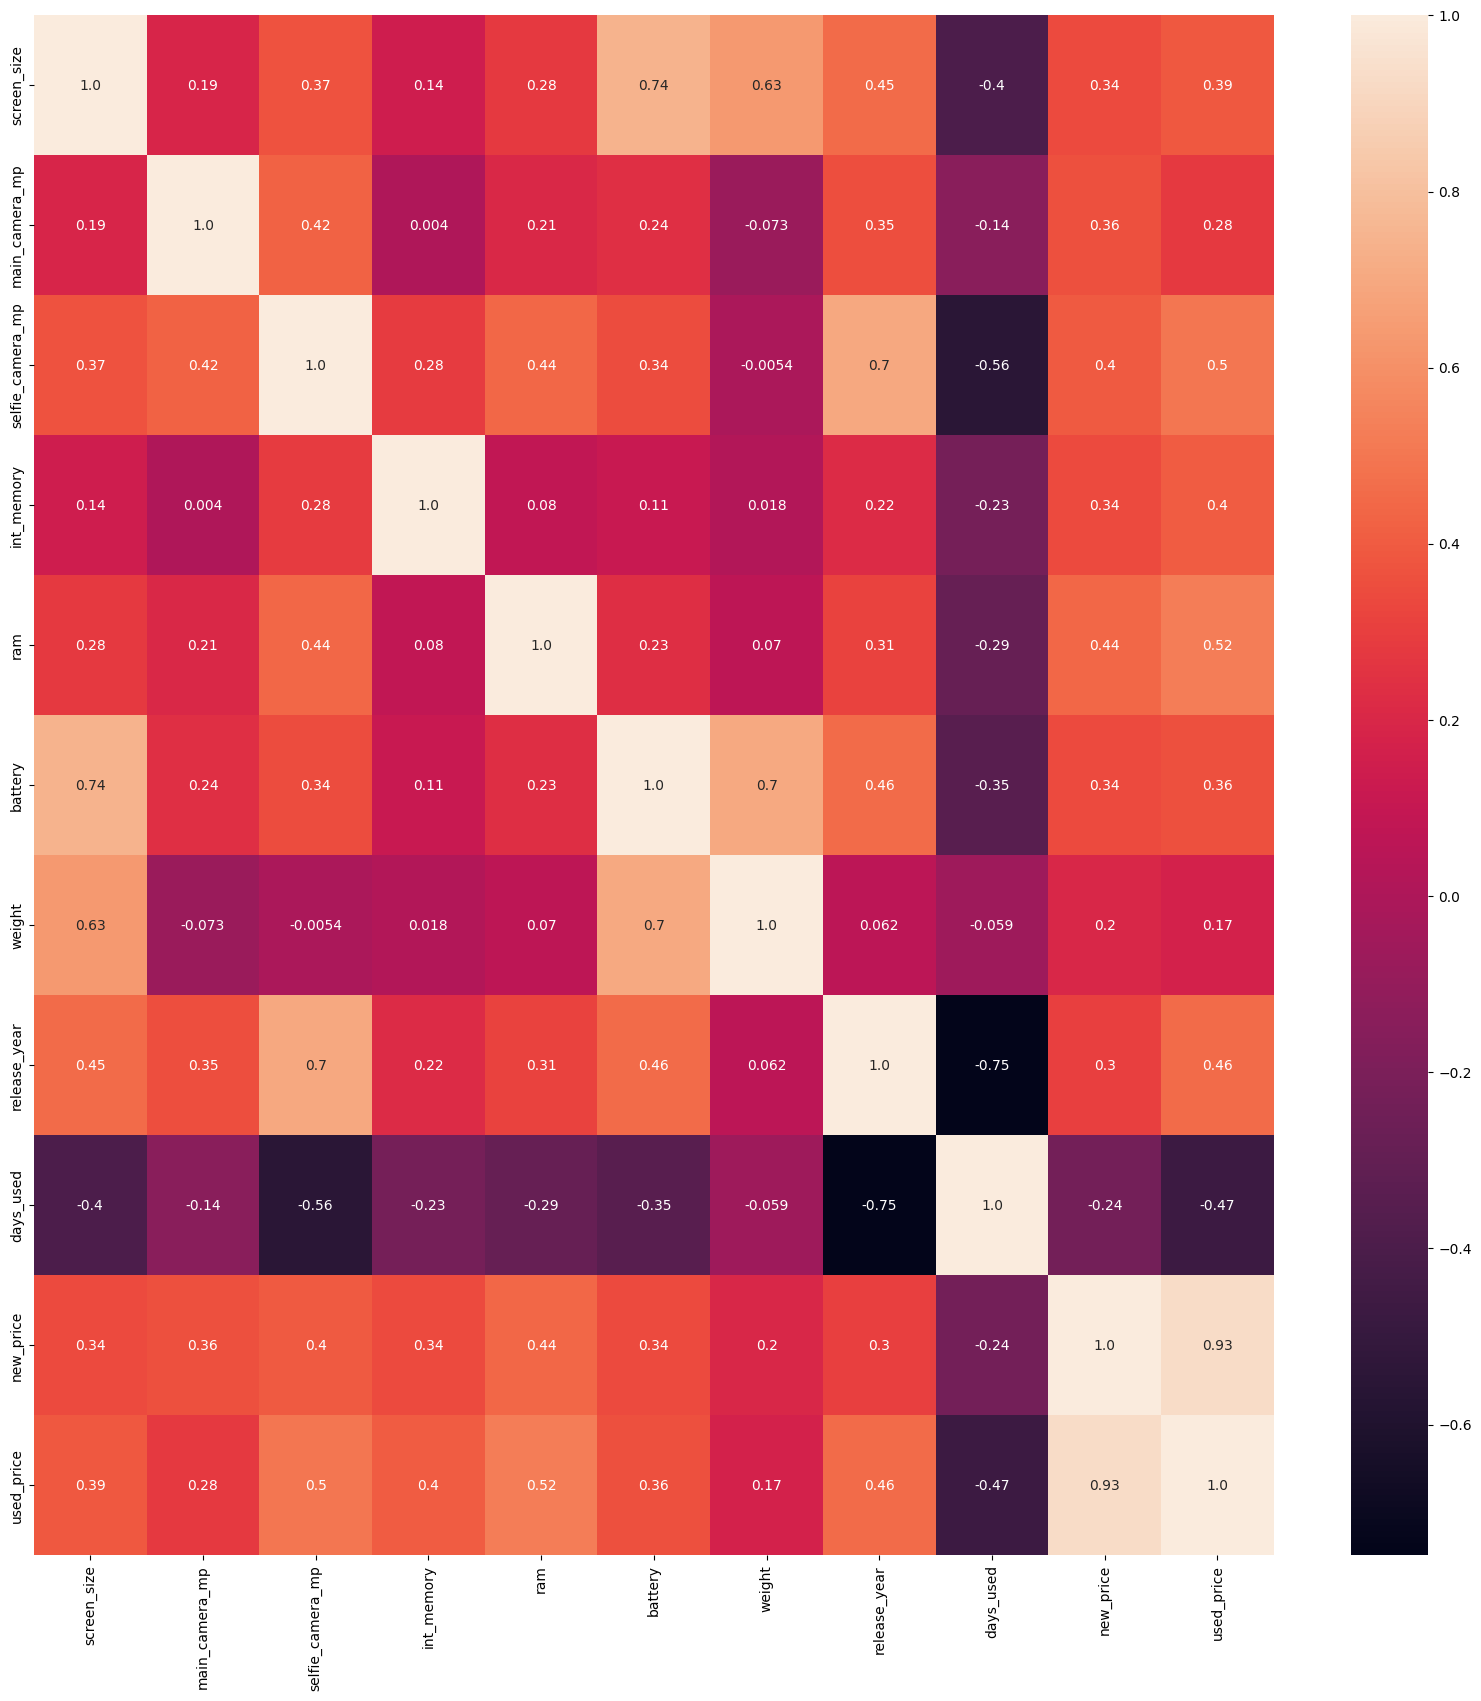

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(mobile.corr(),annot=True,fmt=".2")
plt.show()

replacing the main cam with the median of its own brand using a lambda value

In [50]:
mobile.groupby(["brand_name"],)["main_camera_mp"].median()

brand_name
Acer           5.000
Alcatel        5.000
Apple         12.000
Asus          13.000
BlackBerry     8.000
Celkon         3.150
Coolpad       13.000
Gionee         8.000
Google        12.200
HTC           13.000
Honor         13.000
Huawei        12.825
Infinix          NaN
Karbonn        5.000
LG             8.000
Lava           8.000
Lenovo         8.000
Meizu         13.000
Micromax       5.000
Microsoft      8.000
Motorola      13.000
Nokia          5.000
OnePlus       13.000
Oppo          13.000
Others         8.000
Panasonic      8.000
Realme        13.000
Samsung        8.000
Sony          13.000
Spice          5.000
Vivo          13.000
XOLO           8.000
Xiaomi        13.000
ZTE           13.000
Name: main_camera_mp, dtype: float64


**filling the missing values with its own median**





In [51]:
mobile["main_camera_mp"]=mobile.groupby(["brand_name"])["main_camera_mp"].transform(
    lambda l:l.fillna(l.median())
)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [52]:
mobile.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory          10
ram                  0
battery              6
weight               7
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

In [53]:
mobile['main_camera_mp'].fillna(mobile['main_camera_mp'].mean(),inplace=True)
mobile['int_memory'].fillna(mobile['int_memory'].mean(),inplace=True)
mobile['battery'].fillna(mobile['battery'].mean(),inplace=True)
mobile['weight'].fillna(mobile['weight'].mean(),inplace=True)

In [58]:
mobile.isnull().sum()
mobile.replace({'4g':{'no':0,'yes':1},'5g':{'no':0,'yes':1}},inplace=True)

data preparation

In [59]:
x=mobile.drop("used_price",axis=1)
y=mobile["used_price"]
x.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price
0,Honor,Android,23.97,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62
1,Honor,Android,28.10,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39
2,Honor,Android,24.29,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47
3,Honor,Android,26.04,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93
4,Honor,Android,15.72,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87


In [60]:
x=pd.get_dummies(x,columns=["brand_name","os"])

x.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,...,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS
0,23.97,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,0,0,0,0,0,0,1,0,0,0
1,28.10,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
2,24.29,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
3,26.04,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,...,0,0,0,0,0,0,1,0,0,0
4,15.72,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,...,0,0,0,0,0,0,1,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [62]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
linreg = LinearRegression()
linreg.fit(x,y)
pred_train=linreg.predict(x_train)
pred_test=linreg.predict(x_test)


**r2 :tells how well the data fits the regression**




In [89]:
r2_train=linreg.score(x_train,y_train)
r2_test=linreg.score(x_test,y_test)
print(r2_train)
print(r2_test)



0.9490017032646442
0.9508361886939625


**rmse: root mean square error**

In [93]:
rmse_train=mean_squared_error(y_train,pred_train,squared=False)
rmse_test=mean_squared_error(y_test,pred_test,squared=False)
print(rmse_train)
print(rmse_test)


26.590087805813628
30.015529953735538


In [105]:
X_train_prediction=model.predict(x_train)

In [122]:
print(X_train_prediction)

[164.6768622  130.50609267  99.41585378 ...  87.35092999 248.67708518
  93.95705523]


In [128]:
x_test.head()

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,...,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS
1857,5.40,0,0,1.3,1.3,128.0,4.0,1500.0,97.0,2013,...,0,0,0,0,0,0,0,1,0,0
446,13.49,1,0,21.0,8.0,32.0,4.0,2870.0,150.0,2015,...,0,0,0,0,0,0,0,0,1,0
1097,13.49,1,0,8.0,5.0,16.0,4.0,5000.0,200.0,2015,...,0,0,0,0,0,0,1,0,0,0
2518,12.70,1,0,8.0,5.0,32.0,4.0,2600.0,160.0,2016,...,0,0,0,0,0,0,1,0,0,0
1668,11.27,0,0,8.0,0.3,32.0,4.0,3000.0,151.0,2014,...,0,0,0,0,0,0,1,0,0,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['screen_size'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['4g'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['main_camera_mp'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['screen_size'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['4g'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['main_camera_mp'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'screen_size'], ['screen_size', '4g'], ['4g', 'main_camera_mp'], ['main_camera_mp', 'selfie_camera_mp']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['5g', 'index', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['5g', 'screen_size', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['5g', '4g', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['5g', 'main_camera_mp', None], **{})
chart